In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/Vehicles.csv',encoding='utf-8')

# General info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CRASH_UNIT_ID        460437 non-null  int64  
 1   RD_NO                460437 non-null  object 
 2   CRASH_DATE           460437 non-null  object 
 3   UNIT_NO              460437 non-null  int64  
 4   UNIT_TYPE            460436 non-null  object 
 5   VEHICLE_ID           450064 non-null  float64
 6   MAKE                 450064 non-null  object 
 7   MODEL                448651 non-null  object 
 8   LIC_PLATE_STATE      410808 non-null  object 
 9   VEHICLE_YEAR         371782 non-null  float64
 10  VEHICLE_DEFECT       450064 non-null  object 
 11  VEHICLE_TYPE         450064 non-null  object 
 12  VEHICLE_USE          450064 non-null  object 
 13  TRAVEL_DIRECTION     450064 non-null  object 
 14  MANEUVER             450064 non-null  object 
 15  OCCUPANT_CNT     

# Missing and Unique values

In [5]:
for col in data.columns:
    print(str(col) +": "+ str(data[col].nunique()))

print("------------------------")
for col in data.columns:
    print(str(col) +": "+ str(data[col].isna().sum()))

CRASH_UNIT_ID: 460437
RD_NO: 257925
CRASH_DATE: 166465
UNIT_NO: 11
UNIT_TYPE: 7
VEHICLE_ID: 450064
MAKE: 665
MODEL: 1574
LIC_PLATE_STATE: 52
VEHICLE_YEAR: 131
VEHICLE_DEFECT: 17
VEHICLE_TYPE: 18
VEHICLE_USE: 25
TRAVEL_DIRECTION: 9
MANEUVER: 27
OCCUPANT_CNT: 40
FIRST_CONTACT_POINT: 14
------------------------
CRASH_UNIT_ID: 0
RD_NO: 0
CRASH_DATE: 0
UNIT_NO: 0
UNIT_TYPE: 1
VEHICLE_ID: 10373
MAKE: 10373
MODEL: 11786
LIC_PLATE_STATE: 49629
VEHICLE_YEAR: 88655
VEHICLE_DEFECT: 10373
VEHICLE_TYPE: 10373
VEHICLE_USE: 10373
TRAVEL_DIRECTION: 10373
MANEUVER: 10373
OCCUPANT_CNT: 10373
FIRST_CONTACT_POINT: 10388


# Maximum character length for string attributes of vehicles csv

In [10]:
for col in data.columns:
    if data[f"{col}"].dtype == "object":
        print(f"{col}: "+ str(data[f"{col}"].str.len().max()))

RD_NO: 8
CRASH_DATE: 22
UNIT_TYPE: 19.0
MAKE: 60.0
MODEL: 60.0
LIC_PLATE_STATE: 2.0
VEHICLE_DEFECT: 16.0
VEHICLE_TYPE: 27.0
VEHICLE_USE: 28.0
TRAVEL_DIRECTION: 7.0
MANEUVER: 34.0
FIRST_CONTACT_POINT: 17.0


# Changes to make in the attribute values

In [ ]:
print("UNIT_NO:"+str(data["UNIT_NO"].unique())) #number of units implicated in the rd_no case(No change)
print("---------------")
print("UNIT_TYPE:"+str(data["UNIT_TYPE"].unique())) #Change to UNKNOWN the nan's
print("---------------")
print("LIC_PLATE_STATE:"+str(data["LIC_PLATE_STATE"].unique())) #lic plate state we should rename xx and nan as unknown
print("---------------")
# IF MAKE AND MODEL IF NA APPARENTLY THEY ARE NOT RELEVANT SO WE CAN LEAVE THEM AS THEY ARE RIGHT NOW
# MAKE has some typos to fix
# MODEL has to different UNKNOWNS prob a typo
print("VEHICLE_YEAR:"+str(data["VEHICLE_YEAR"].unique())) #Change the vehicles year from 2024 up, to UNKNOWN, na to UNKNOWN too
print("---------------")
print("VEHICLE_DEFECT:"+str(data["VEHICLE_DEFECT"].unique())) #modify nan to unknown
print("---------------")
print("VEHICLE_TYPE:"+str(data["VEHICLE_TYPE"].unique())) #Change nan to UNKNOWN/NA
print("---------------")
print("VEHICLE_USE:"+str(data["VEHICLE_USE"].unique())) #Change nan to UNKNOWN/NA(same as above)
print("---------------")
print("TRAVEL_DIRECTION:"+str(data["TRAVEL_DIRECTION"].unique())) #nan to UNKNOWN
print("---------------")
print("MANEUVER:"+str(data["MANEUVER"].unique())) #nan to UNKNOWN/NA
print("---------------")
print("OCCUPANT_CNT:"+str(data["OCCUPANT_CNT"].unique())) #After checking, numbers appear right nan's to UNKNOWN?
print("---------------")
print("FIRST_CONTACT_POINT:"+str(data["FIRST_CONTACT_POINT"].unique())) #nan to UNKNOWN
print("---------------")



UNIT_NO:[ 1  2  3  4  5  6  7  8  0  9 10]
---------------
UNIT_TYPE:['DRIVER' 'PARKED' 'PEDESTRIAN' 'BICYCLE' 'NON-MOTOR VEHICLE' 'DRIVERLESS'
 'NON-CONTACT VEHICLE' nan]
---------------
LIC_PLATE_STATE:['XX' 'IL' nan 'WI' 'IA' 'IN' 'MI' 'CA' 'TX' 'MN' 'OK' 'FL' 'OH' 'MO' 'ID'
 'KY' 'MS' 'AZ' 'ND' 'TN' 'GA' 'PA' 'MA' 'CO' 'WA' 'NC' 'KS' 'VA' 'NY'
 'OR' 'NV' 'NB' 'ME' 'RI' 'MD' 'NM' 'LA' 'SC' 'DE' 'AR' 'SD' 'NJ' 'CT'
 'WV' 'UT' 'AL' 'MT' 'NH' 'HI' 'DC' 'WY' 'AK' 'VT']
---------------
VEHICLE_YEAR:[  nan 2003. 2001. 2013. 2016. 2015. 2007. 2002. 2011. 2010. 2014. 2017.
 1999. 2006. 2004. 2012. 2008. 2009. 2000. 2018. 1997. 2005. 1995. 1998.
 2020. 2103. 1991. 2019. 1996. 1993. 1992. 1994. 1990. 9999. 1989. 1984.
 2204. 2915. 1986. 1900. 2913. 1988. 1987. 2205. 3007. 1982. 2107. 2041.
 2999. 2917. 1976. 2105. 2201. 1973. 2104. 2918. 1983. 1981. 1985. 2911.
 2916. 1980. 2099. 2208. 1979. 3017. 2033. 2207. 1978. 1901. 1970. 1969.
 2028. 1977. 2022. 2096. 1971. 2206. 1968. 1967. 1941. 2102.

#### Unit type already nan cant be assigned to any of the lables already present by cheking the make and model we can know what type of vehicle it is BUT since this attribute also represents the status of the vehicle at the moment of the crash we cannot determine if it was parked, driven or something else.

#### License plate appears to have a place holder already being XX, it also has nan value, it being of type string is better to replace those two with an unknown label.

# Changes to make in VEHICLE YEAR 

### a lot of them can be replaced in some way, the 9999 appears as a typo for 1999 since is the one that has a lot of occurences(257), the rest have at max 7-8 occurences, could be set as unknown

In [ ]:
filtered_df = data[(data['VEHICLE_YEAR'] > 2024) & data['VEHICLE_YEAR'].notnull()]
print("total entries with wrong year date: " + str(len(filtered_df)))
filtered_df = filtered_df["VEHICLE_YEAR"].unique()
print("unique entries with wrong year date: " + str(filtered_df.size))
#Count by vehicle year date
""" for i in filtered_df:
    print(str(i)+": "+str(data[data["VEHICLE_YEAR"] == i]["VEHICLE_YEAR"].count()))
 """

total entries with wrong year date: 422
unique entries with wrong year date: 61


' for i in filtered_df:\n    print(str(i)+": "+str(data[data["VEHICLE_YEAR"] == i]["VEHICLE_YEAR"].count()))\n '

#### For vehicle defect we already have a label for unknown thus we can put the nan's on this label.

# OCCUPANT COUNT (Very few vehicles are carrying more than 6 persons during the accident)

In [ ]:
filtered_df = data[(data['OCCUPANT_CNT'] > 6) & data['OCCUPANT_CNT'].notnull()]
print("total entries with more than usual ppl: " + str(len(filtered_df)))
filtered_df = filtered_df["OCCUPANT_CNT"].unique()
print("unique entries with more than usual ppl: " + str(filtered_df.size))
""" for i in filtered_df:
    print(str(i)+": "+str(data[data["OCCUPANT_CNT"] == i]["OCCUPANT_CNT"].count())) """


total entries with more than usual ppl: 471
unique entries with more than usual ppl: 33


' for i in filtered_df:\n    print(str(i)+": "+str(data[data["OCCUPANT_CNT"] == i]["OCCUPANT_CNT"].count())) '

# Check for semantic inconsistencies on vehicle make and model(Some typos on the names of makes)

In [ ]:
df_cleaned = data.dropna(subset=['MAKE','MODEL'])
import Levenshtein

def find_similar_words(word_list, threshold=2):

    similar_words = []
    for i in range(len(word_list)):
        for j in range(i + 1, len(word_list)):
            distance = Levenshtein.distance(word_list[i], word_list[j])
            if distance <= threshold:
                similar_words.append((word_list[i], word_list[j]))

    return similar_words

word_list = df_cleaned["MAKE"].unique()
similar_pairs = find_similar_words(word_list)
print(similar_pairs)

more_tan5_model = df_cleaned[df_cleaned['MAKE'].str.len() > 8].drop_duplicates()
word_list = more_tan5_model['MAKE'].unique()
similar_pairs = find_similar_words(word_list)
print(similar_pairs)

#('NEW HOLLAND, DIV. OF SPERRY NEW HOLLAND', 'NEW HOLLAND, (DIV. OF SPERRY NEW HOLLAND)')
#('AMC (LAWN & GARDEN TRACTORS BY AMERICAN MOTORS)', 'AMC (LAWN & GARDEN TRACTORS BY AMMERICAN MOTORS)')
#('ROLLS ROYCE', 'ROLLS-ROYCE')

[('FORD', 'BIRD'), ('BMW', 'MG'), ('BMW', 'LMC'), ('BMW', 'HM'), ('BMW', 'BSA'), ('MERCURY', 'MERKUR'), ('MINI', 'HINO'), ('FIAT', 'CAT'), ('SAAB', 'STAR'), ('SPYDER', 'RYDER'), ('SMART', 'STAR'), ('NEW HOLLAND, DIV. OF SPERRY NEW HOLLAND', 'NEW HOLLAND, (DIV. OF SPERRY NEW HOLLAND)'), ('RYDER', 'ROVER'), ('GEM', 'GEO'), ('GEM', 'KTM'), ('GEM', 'ZIM'), ('GEM', 'HM'), ('URAL', 'TRAC'), ('RAMBLER', 'HUMBLER'), ('EIDAL INTERNATIONAL CORP.', 'MIDAS INTERNATIONAL CORP.'), ('PUMA', 'PUCH'), ('HILL DUMP TRAILER', 'HIRE DUMP TRAILER'), ('CMI CORP.', 'FMC CORP.'), ('ROVER', 'GROVE'), ('GO CART - MOTORIZED', 'GOLF CART - MOTORIZED'), ('KTM', 'ZIM'), ('KTM', 'PTV'), ('KTM', 'HM'), ('SAFARI', 'SAFTI'), ('ZIM', 'HM'), ('TEMPO', 'DEMCO'), ('AMC (LAWN & GARDEN TRACTORS BY AMERICAN MOTORS)', 'AMC (LAWN & GARDEN TRACTORS BY AMMERICAN MOTORS)'), ('MG', 'LMC'), ('MG', 'HM'), ('LMC', 'HM'), ('GROVE', 'GLOBE'), ('ROLLS ROYCE', 'ROLLS-ROYCE'), ('JAMES', 'RAMSES'), ('GILSON', 'OLSON')]
[('NEW HOLLAND, DIV. O

In [ ]:
word_list = df_cleaned["MODEL"].unique()
similar_pairs = find_similar_words(word_list)
print(similar_pairs)
more_tan5_model = df_cleaned[df_cleaned['MODEL'].str.len() > 9].drop_duplicates()
word_list = more_tan5_model['MODEL'].unique()
similar_pairs = find_similar_words(word_list)
print(similar_pairs)

#('UNKNOWN', 'UNKOWN')


[('UNKNOWN', 'UNKOWN'), ('X5', 'G6'), ('X5', 'QX56'), ('X5', 'Q7'), ('X5', 'A4'), ('X5', 'XG'), ('X5', 'TL'), ('X5', 'G35'), ('X5', 'SL'), ('X5', 'Q5'), ('X5', 'E55'), ('X5', 'TI'), ('X5', 'SC'), ('X5', 'EX35'), ('X5', 'XJ8'), ('X5', 'A6'), ('X5', 'X3'), ('X5', 'XB'), ('X5', 'XJ6'), ('X5', 'FX35'), ('X5', 'TC'), ('X5', '325'), ('X5', 'A8'), ('X5', 'M35'), ('X5', 'FX45'), ('X5', 'MX3'), ('X5', 'A3'), ('X5', 'XJS'), ('X5', 'G5'), ('X5', 'CC'), ('X5', 'SX4'), ('X5', '750'), ('X5', 'XD'), ('X5', 'XL'), ('X5', 'Q45'), ('X5', 'G55'), ('X5', 'QX4'), ('X5', 'I35'), ('X5', 'LS'), ('X5', 'EXP'), ('X5', 'RX'), ('X5', 'RL'), ('X5', 'XLR'), ('X5', 'H3'), ('X5', 'H2'), ('X5', 'M45'), ('X5', '98'), ('X5', '88'), ('X5', 'G25'), ('X5', 'XJ'), ('X5', 'NX'), ('X5', '635'), ('X5', 'S8'), ('X5', 'S6'), ('X5', 'XT6'), ('X5', 'XE'), ('X5', 'XJR'), ('X5', 'S4'), ('X5', 'ZX2'), ('X5', 'M-5'), ('X5', 'M56'), ('X5', 'A2'), ('X5', 'GL'), ('X5', 'L6'), ('X5', 'Z3'), ('X5', '95'), ('X5', '9-5'), ('X5', 'RX8'), ('X5

# Check for dates in the future (No dates in the future)

In [ ]:
# Convert the 'Date' column to datetime format
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])

# Filter rows where the date is after 01/01/2024 12:00 AM
filtered_df = data[data['CRASH_DATE'] >= pd.to_datetime('2020-01-01 00:00:00')]['CRASH_DATE']

print(filtered_df)

/var/folders/8m/qnsd93mj7d39x546m82xm9xm0000gn/T/ipykernel_1555/3930451147.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])


Series([], Name: CRASH_DATE, dtype: datetime64[ns])


# Visualizations

#### Showing how the vehicle type and the unit type stack up
#### Most of the accidents happened during the driving of the vehicles

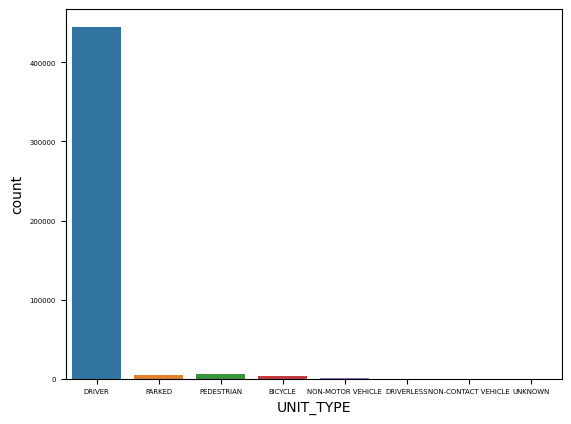

In [ ]:
data = pd.read_csv('../data/Vehicles_Processed.csv',encoding='utf-8')
# Create a count plot
sns.countplot(x="UNIT_TYPE", data=data)
# Adjust the font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

#### The main directions are the most prevalent in the data of the vehicles

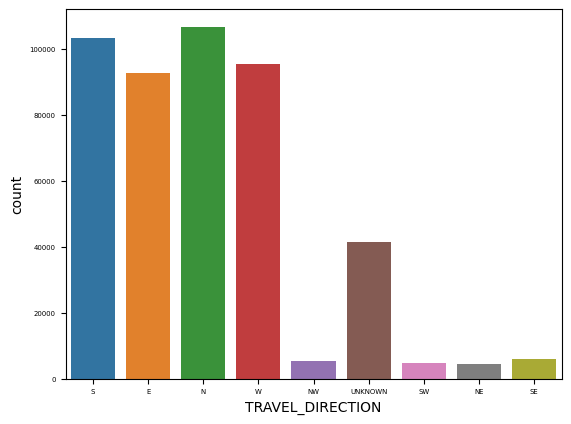

In [ ]:
# Create a count plot
sns.countplot(x="TRAVEL_DIRECTION", data=data)
# Adjust the font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

#### Total, roof and others appear to be the less reported first contact points, this can be expected from a crashed car, while the most common are the front parts of the vehicle.

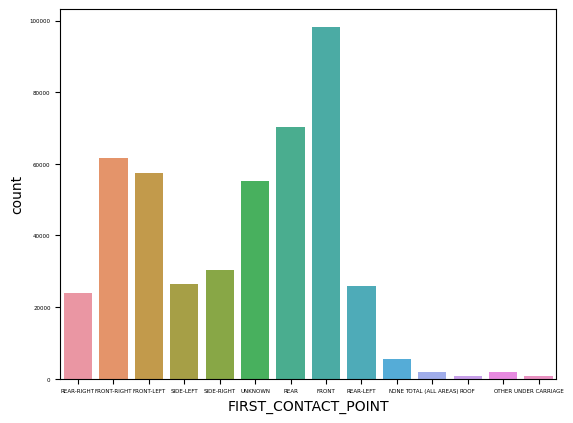

In [ ]:
# Create a count plot
sns.countplot(x="FIRST_CONTACT_POINT", data=data)
# Adjust the font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=4)
plt.show()